In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans

In [63]:
df = pd.read_csv(r'./gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [64]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [65]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [66]:
df.duplicated().sum()

1768

In [67]:
df.shape

(5001, 8)

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
df.shape

(3233, 8)

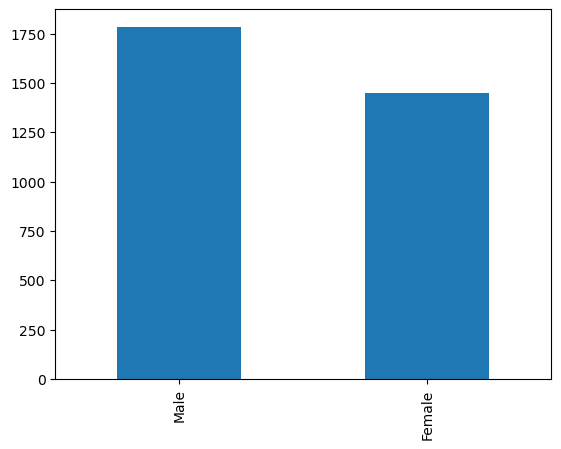

In [70]:
df['gender'].value_counts().plot.bar();

In [71]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

# to have a dict of gender & encode 
lable.fit(df['gender'])
label_name_mapping = dict(zip(lable.classes_, lable.transform(lable.classes_)))
print(label_name_mapping)

#Encode class col
df['gender']=lable.fit_transform(df['gender'])
df

{'Female': 0, 'Male': 1}


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,1
4990,1,12.6,5.7,0,0,1,0,0
4992,1,14.1,7.0,1,1,1,1,1
4993,1,11.6,5.9,0,0,0,1,0


In [72]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [73]:
#to round up all the columns
df.update(df.select_dtypes(np.number).apply(np.ceil))

In [74]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,12.0,7.0,1.0,0.0,1.0,1.0,1.0
1,0.0,14.0,6.0,0.0,0.0,1.0,0.0,0.0
2,0.0,12.0,7.0,1.0,1.0,1.0,1.0,1.0
3,0.0,15.0,7.0,0.0,1.0,1.0,1.0,1.0
4,1.0,14.0,6.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#to convert to int all the dataset
df = df.astype(int)

## ---------- Machine learning : supervised ------------

In [76]:
X = df.drop(['gender'], axis = 1)
y = df['gender']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2263, 7)
(2263,)
(970, 7)
(970,)


In [78]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 94.74226804123711 %


In [79]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


The classification report for RandomForestClassifier is:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       425
           1       0.95      0.95      0.95       545

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



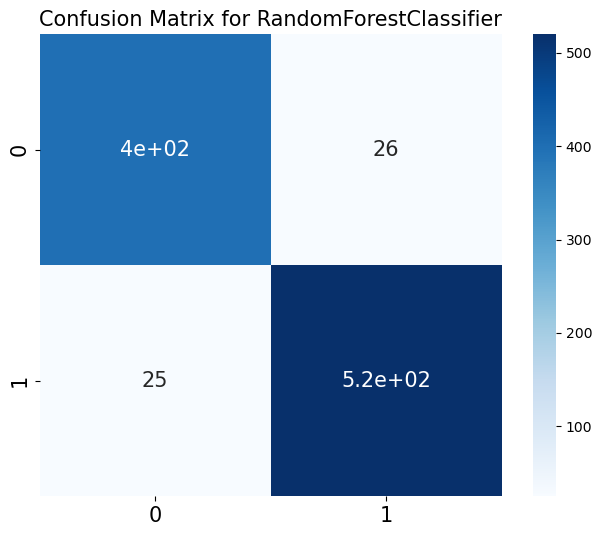

In [80]:
generate_results(rfc, y_pred_rfc, 'RandomForestClassifier')

In [81]:
print(metrics.roc_auc_score(y_test,y_pred_rfc))

0.9464759848893687


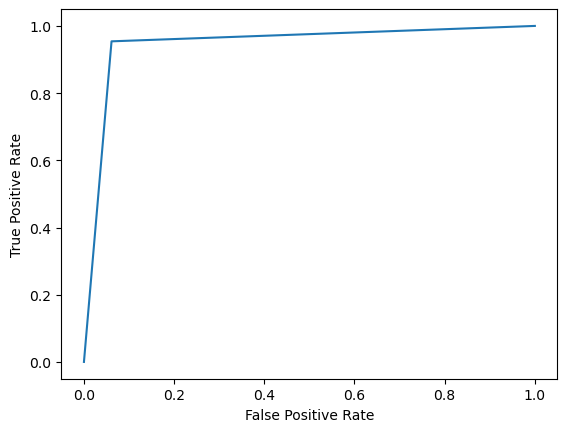

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_rfc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

## ------------- Machine Learning : Unsupervised -----------------

In [85]:
def evaluation (X,y_true, y_label, n_clusters_):
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, y_label))
    print("Completeness: %0.3f" % metrics.completeness_score(y_true, y_label))
    print("V-measure: %0.3f" % metrics.v_measure_score(y_true, y_label))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_true, y_label))
    print(
        "Adjusted Mutual Information: %0.3f"
        % metrics.adjusted_mutual_info_score(y_true, y_label))
    print(    "Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, y_label, metric="sqeuclidean"))

In [87]:
print("KMeans: \n")

kmeans2 = KMeans(n_clusters=2).fit(X)
y_labels = kmeans2.labels_
evaluation(X,  y, y_labels, 2)

KMeans: 

Estimated number of clusters: 2
Homogeneity: 0.030
Completeness: 0.030
V-measure: 0.030
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.030
Silhouette Coefficient: 0.483


In [88]:
print("KMeans: \n")

kmeans2 = KMeans(n_clusters=3).fit(X)
y_labels = kmeans2.labels_
evaluation(X,  y, y_labels, 2)

KMeans: 

Estimated number of clusters: 2
Homogeneity: 0.464
Completeness: 0.291
V-measure: 0.358
Adjusted Rand Index: 0.333
Adjusted Mutual Information: 0.357
Silhouette Coefficient: 0.384


In [89]:
print("KMeans: \n")

kmeans2 = KMeans(n_clusters=4).fit(X)
y_labels = kmeans2.labels_
evaluation(X,  y, y_labels, 2)

KMeans: 

Estimated number of clusters: 2
Homogeneity: 0.596
Completeness: 0.297
V-measure: 0.396
Adjusted Rand Index: 0.340
Adjusted Mutual Information: 0.396
Silhouette Coefficient: 0.384
